In [6]:
import tensorflow as tf
%matplotlib inline
import matplotlib.pyplot as plot
import numpy as np

D:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


(506, 13) ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT'] (506,)


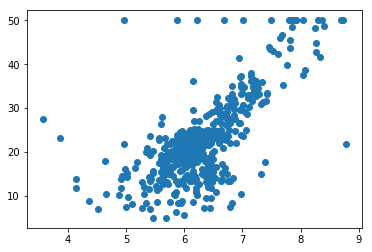

In [12]:
#genrate data 
from sklearn import datasets
boston_dataset=datasets.load_boston()
print(boston_dataset.data.shape,boston_dataset.feature_names,boston_dataset.target.shape)
Xs = np.array(boston_dataset.data[:,5])
Ys = np.array(boston_dataset.target)
plot.scatter(Xs, Ys)

In [35]:
X = tf.placeholder(tf.float32,name="Xrm")
Y = tf.placeholder(tf.float32,name="Y")
W = tf.Variable(tf.random_normal([1]),name="weights")
b = tf.Variable(tf.random_normal([1]),name="bias")
Ypred = tf.add(tf.multiply(W,X),b) #predict
#loss
loss = tf.square(Y - Ypred,name='loss')
#初始化优化器
learning_rate = 0.001
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

n_samples = Xs.shape[0]
print(n_samples)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    writer = tf.summary.FileWriter('.\linear_reg',sess.graph)
    # 训练模型
    for i in range(20):
        total_loss = 0
        for x, y in zip(Xs, Ys):
           # 通过feed_dic把数据灌进去
            t, l = sess.run([optimizer, loss], feed_dict={X: x, Y:y}) 
            total_loss += l
        b = total_loss/n_samples
        writer.add_summary(l,i)
        if i%2 ==0:
            print('Epoch {0}: {1}'.format(i, total_loss/n_samples))
    # 关闭writer
    writer.close() 
    # 取出w和b的值
    W, b = sess.run([W, b]) 

506


AttributeError: 'numpy.ndarray' object has no attribute 'value'

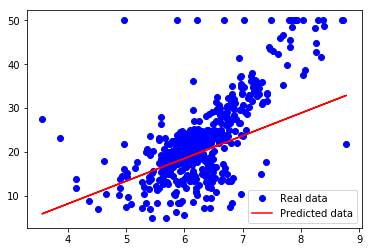

In [25]:
plot.plot(Xs, Ys, 'bo', label='Real data')
plot.plot(Xs, Xs * W + b, 'r', label='Predicted data')
plot.legend()
plot.show()